# Random Forest Algoritması

- Random forest algoritması ,denetimli sınıflandırma algoritmalarından biridir. Hem regresyon hem de sınıflandırma problemlerinde kullanılmaktadır. Algoritma ,birden fazla karar ağacı üreterek sınıflandırma işlemi esnasında sınıflandırma değerini yükseltmeyi hedefler.
- **Random forest algoritması birbirinden bağımsız olarak çalışan birçok karar ağacının bir araya gelerek aralarından en yüksek puan alan değerin seçilmesi işlemidir.**

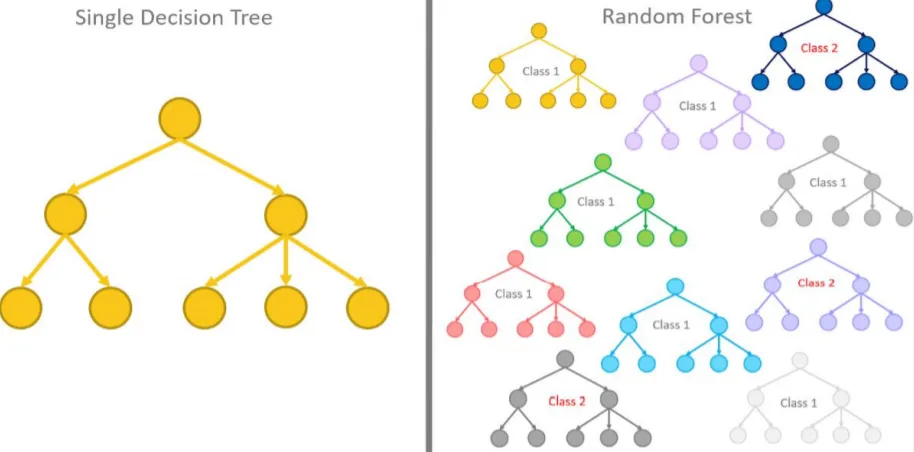

- Yukarıda da göreceğiniz üzere tek bir karar ağacı ve birden fazla karar ağacının oluşturduğu Random Forest yapısını görmektesiniz.

Random Forest'da, her bir karar ağacı bir sonuç (class) üretir. Bu üretilen bütün sonuçlar puanlanır ve en çok puana sahip olan cevap olarak kullanıcıya iletilir.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('audi.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [3]:
df.isnull().sum()
# Null olarak görünen bir değer yok, bu durumda fill ya da drop yapmaya gerek yok

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [4]:
# Model string bir değer içeriyor, bunları sayısal bir değere çevirelim

la = LabelEncoder()
df['model'] = la.fit_transform(df['model'])
df['transmission'] = la.fit_transform(df['transmission'])
df['fuelType'] = la.fit_transform(df['fuelType'])

df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,2017,12500,1,15735,2,150,55.4,1.4
1,5,2016,16500,0,36203,0,20,64.2,2.0
2,0,2016,11000,1,29946,2,30,55.4,1.4
3,3,2017,16800,0,25952,0,145,67.3,2.0
4,2,2019,17300,1,1998,2,145,49.6,1.0


In [5]:
X = df.drop(columns=['price'])
y = df['price']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = RandomForestRegressor(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [10]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")

MAE: 1642.7960141328263
MSE: 6445588.287222371
RMSE: 2538.81631616436
R2: 0.9573505614056188


In [13]:
data = np.array([
    [7, 2020, 0, 30000, 0, 20, 64.2, 2.0]
])
pred = model.predict(data)
print(f"Predicted price: {pred[0]}")

Predicted price: 31515.6


/opt/anaconda3/envs/python_a/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
